In [94]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [79]:
print(tf.__version__)

2.15.0


In [80]:
mnist = tf.keras.datasets.mnist
#load the data
(X_train,y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [81]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [82]:
y_train.shape

(60000,)

In [83]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

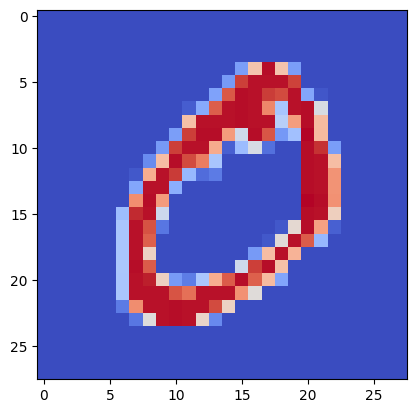

In [84]:
plt.imshow(X_train[1], cmap='coolwarm')

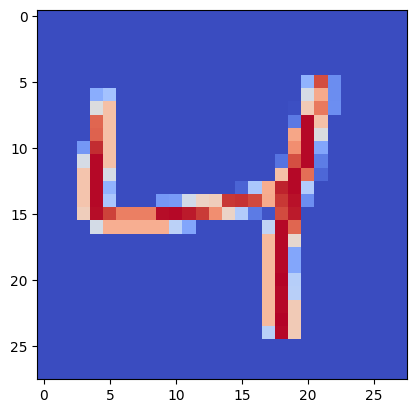

In [85]:
plt.imshow(X_train[2],cmap='coolwarm')

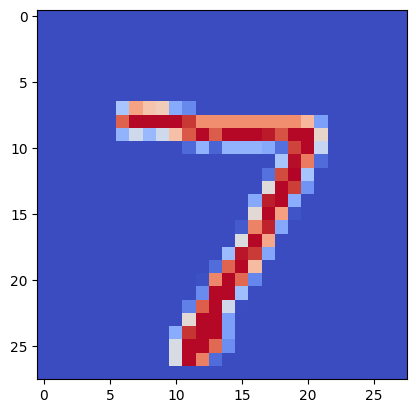

In [143]:
plt.imshow(X_test[0],cmap='coolwarm')

In [87]:
print(y_test[0])

7


In [88]:
print(28*28)

784


In [89]:
#dimensions
print(X_train[0].ndim)
print(X_test[0].ndim)

2
2


In [128]:
#scaling the data
#each individualal value between 0-255
#befoure we reshape the data we can scale the data

X_train = X_train/255
X_test = X_test/255

In [130]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [131]:
#converting the 2D array into 1D array
X_train_pro = X_train.reshape(len(X_train),784)
X_test_pro = X_test.reshape(len(X_test),784)

print(X_train_pro.shape)
print(X_test_pro.shape)

(60000, 784)
(10000, 784)


In [132]:
#check the dimension of the data
print(X_train_pro[0].ndim)
print(X_test_pro[0].ndim)
print('SHAPE'.center(82,'~'))
print(X_train_pro.shape)
print(X_test_pro.shape)

1
1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(60000, 784)
(10000, 784)


In [133]:
print(X_train_pro[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [134]:
#model building
model = tf.keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_pro, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4700 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2837 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2669 - accuracy: 0.9258


In [127]:
#predict sample feature of the training data
model.predict(np.reshape(X_train_pro[0], (1, -1)))

1/1 [==============================] - 0s 17ms/step


array([[1.0000000e+00, 0.0000000e+00, 9.9999833e-01, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.7974251e-25,
        1.0000000e+00, 1.7742739e-03]], dtype=float32)

In [137]:
pred = model.predict(X_test_pro)
print(pred[0])

313/313 [==============================] - 1s 3ms/step
[2.4201257e-02 3.9185122e-07 7.7472381e-02 9.6488065e-01 1.5587283e-03
 1.3723086e-01 2.2712277e-06 9.9982619e-01 1.5302649e-01 7.5531870e-01]


In [141]:
print(np.argmax(pred[0]))

7


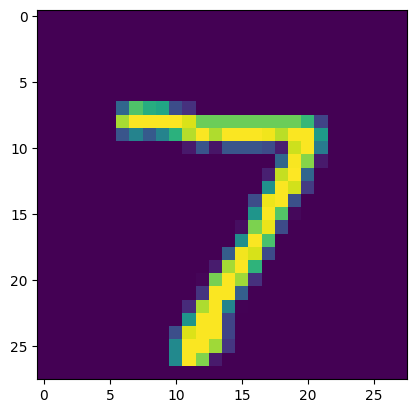

In [142]:
plt.imshow(X_test[0])

In [148]:
print(pred[5])

[8.2360079e-05 9.9789274e-01 5.5818397e-01 3.5900220e-01 5.2811583e-03
 1.8430648e-02 1.0825228e-02 5.2769250e-01 5.0828081e-01 1.9946860e-01]


In [160]:
print(np.argmax(pred[6]))

4


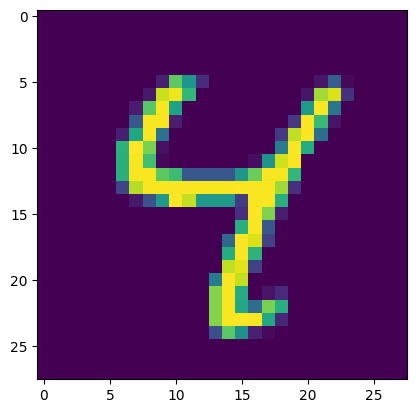

In [161]:
plt.imshow(X_test[6])

In [171]:
Pred_lables = [np.argmax(i) for i in pred]
print(Pred_lables[:5])

[7, 2, 1, 0, 4]


In [173]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

tf.Tensor(
[[ 959    0    2    2    0    6    7    2    2    0]
 [   0 1112    3    2    0    1    4    2   11    0]
 [   3    9  931   14    5    5   14   10   36    5]
 [   3    0   22  914    0   24    3   11   22   11]
 [   1    1    7    2  876    0   12    4   11   68]
 [   8    3    3   24    6  783   19    7   31    8]
 [   7    3    7    1    7   12  917    2    2    0]
 [   1    6   24    4    3    1    0  950    3   36]
 [   5    7    8   17    8   21   11   11  875   11]
 [   9    6    2    9   11    5    0   17    7  943]], shape=(10, 10), dtype=int32)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~CM~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


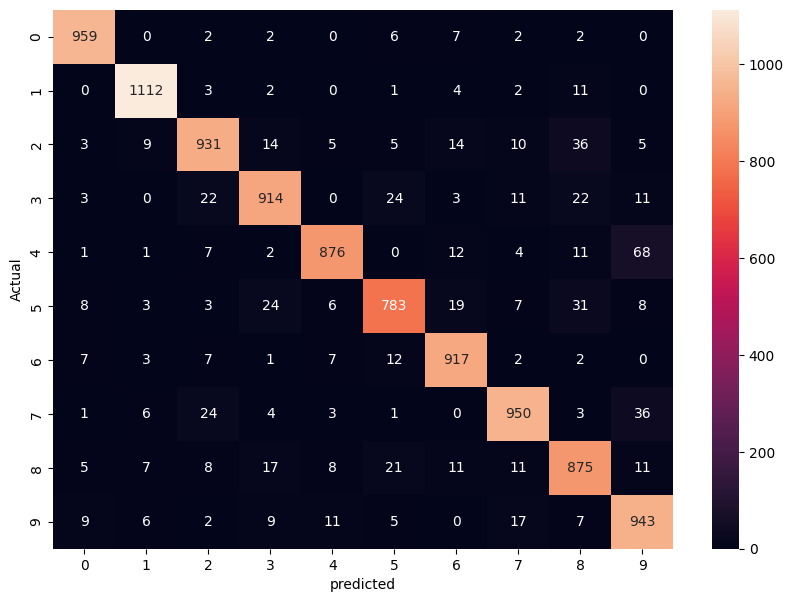

In [186]:
#printe the confussion matrics
cm = tf.math.confusion_matrix(labels=y_test, predictions=Pred_lables)
print(cm)
print('CM'.center(82,'~'))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()